In [7]:
import numpy as np
import pandas as pd


In [8]:
df = pd.read_csv('/placement.csv')

In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df =df.iloc[:,1:]

In [11]:
df.shape

(100, 3)

In [12]:
df.head(


)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
#steps
#0: preprocess + eda + feature selection
#1. Extract input and output cols
#2, Scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/ model Selection
#6. Deploy the model

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [14]:
df.shape

(100, 3)

In [15]:
import matplotlib.pyplot as plt

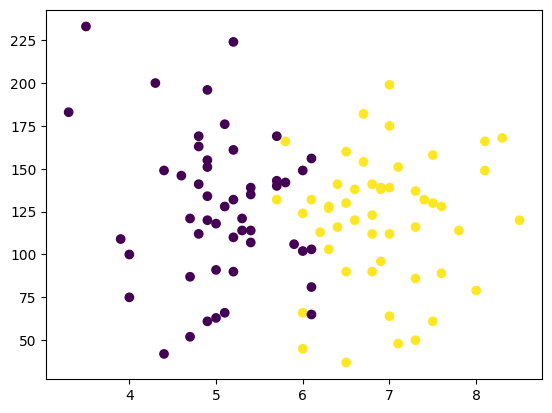

In [18]:
plt.scatter(df['cgpa'], df['iq'], c= df['placement'])

In [20]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [21]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [22]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [26]:
X_train

,cgpa,iq
52,7.0,175.0
37,8.1,149.0
79,6.5,90.0
42,7.6,89.0
49,5.4,135.0
...,...,...
90,7.3,86.0
8,6.1,156.0
43,6.8,141.0
98,6.3,103.0


In [27]:
y_train

,placement
52,1
37,1
79,1
42,1
49,0
...,...
90,1
8,0
43,1
98,1


In [28]:
X_test

,cgpa,iq
51,4.8,141.0
27,6.0,124.0
44,7.5,61.0
53,8.3,168.0
88,4.4,149.0
12,5.4,139.0
94,4.7,52.0
57,6.5,130.0
36,5.7,140.0
87,5.7,132.0


In [29]:
y_test

,placement
51,0
27,1
44,1
53,1
88,0
12,0
94,0
57,1
36,0
87,1


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_train

array([[ 8.81868973e-01,  1.27945732e+00],
       [ 1.85300388e+00,  6.32540699e-01],
       [ 4.40444014e-01, -8.35462409e-01],
       [ 1.41157892e+00, -8.60343818e-01],
       [-5.30690895e-01,  2.84200978e-01],
       [ 6.17013998e-01,  1.45362718e+00],
       [-7.95545870e-01, -1.43261622e+00],
       [-9.80944353e-04,  6.32540699e-01],
       [-7.07260878e-01, -3.37834237e-01],
       [ 7.05298990e-01, -1.43759250e-02],
       [-5.30690895e-01, -2.38308603e-01],
       [-9.72115854e-01, -8.90201508e-02],
       [-7.95545870e-01,  1.30433873e+00],
       [-2.65835920e-01,  4.83252247e-01],
       [ 1.76471889e+00, -1.10915790e+00],
       [ 1.41157892e+00,  1.10031118e-01],
       [ 1.58814891e+00, -2.38308603e-01],
       [ 7.05298990e-01, -2.88071420e-01],
       [-7.07260878e-01,  2.49864635e+00],
       [ 1.14672395e+00,  3.33963796e-01],
       [-1.06040085e+00,  9.80880420e-01],
       [ 8.73040474e-02, -1.05939509e+00],
       [ 8.81868973e-01,  3.83726613e-01],
       [ 9.

In [34]:
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression()

In [37]:
#model training
clf.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = clf.predict(X_test)

In [39]:
y_test

,placement
51,0
27,1
44,1
53,1
88,0
12,0
94,0
57,1
36,0
87,1


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.8

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

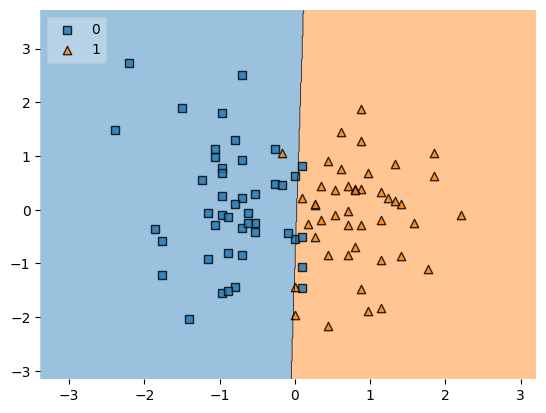

In [51]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend = 2)

In [50]:
type(y_train)

pandas.core.series.Series

In [52]:
import pickle

In [54]:
pickle.dump(clf,open('model.pkl','wb'))